# Holomorphic functions
```{index} Holomorphic function
```

(comp_diff)=
## Complex differentiation
```{index} Complex differentiation
```
Holomorphic functions (often called complex analytic functions)

A function $f : D \to \mathbb{C}$, where $D \subseteq \mathbb{C}$ is an open set, is *complex-differentiable at a point* $z_0 \in D$ if there exists

$$ f'(z_0) = \lim_{z \to z_0} \frac{f(z) - f(z_0)}{z - z_0} \in \mathbb{C}. $$

If $f : D \to \mathbb{C}$ is differentiable at all points of $D$, we say it is **holomorphic** (often **analytic**) in $D$. If a function is holomorphic in $\mathbb{C}$ we say that it is **entire**.

**Examples:**

- $z$ is entire
- all polynomials are entire
- \\( 1/z \\) is holomorphic in \\( \mathbb{C} \backslash \{ 0 \} \\)
- all rational functions are holomorphic in $\mathbb{C}$ except in the zeros of their denominators
- \\( \sin z, \cos z \\) are entire
- \\( \sqrt{z} \\) is holomorphic in $\mathbb{C} \backslash (- \infty, 0]$

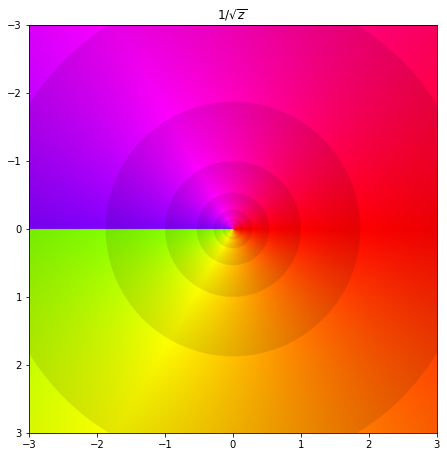

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb


def phaseplot(ax, f, x=None, y=None):

    a = np.log(np.abs(f)) * 20 / (2*np.pi)
    a = a - a//1
    _amin = np.min(a)
    _amax = np.max(a)
    
    h = (np.angle(-f) + np.pi) / (2*np.pi)
    v = (a - _amin) / (_amax - _amin) * (1 - 0.9) + 0.9
    
    if x is None:
        extent = None
    else:
        extent = [min(x), max(x), min(y), max(y)]
    
    img = hsv_to_rgb(np.dstack((h, np.ones(f.shape), v)))
    
    ax.imshow(img, extent=extent)
    ax.invert_yaxis()
    
    
x = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x, x)
Z = X + 1j*Y

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_subplot()
ax.set_title('$1/ \sqrt{z}$')

phaseplot(ax, 1/np.sqrt(Z), x, x)
plt.show()

If we go back to thinking about a derivative of a real function of one variable, recall that for the derivative to exist at $x_0$ the limit when approaching $x_0$ from the left and from the right must be equal to each other. That is because $x_0$ is just a number on the number line. Complex numbers, however, lie on the plane, so we can approach some complex number $z_0$ from any direction. Therefore, the limit above must exist for **any angle of approach** to $z_0$ and it must always be the same. This is a very strict condition!

For $f$ to be differentiable at $z_0$ it must be **continuous** at $z_0$. That means that

$$ \lim_{z \to z_0} f(z) = f(z_0) $$

for finite $z_0, f(z_0)$. Recall that we can separate the real and imaginary parts of a complex function: $f(z) = u(x, y) + iv(x, y)$. For $f$ to be continuous, it is enough to show that $u$ and $v$ are continuous. If $f$ is holomorphic on $D$ then it is continuous on $D$.

```{admonition} Differentiation rules

The addition, product, quotient and chain rules apply in complex differentiation similarly to real calculus. Let $f, g : D \to \mathbb{C}$ be differentiable at $z_0 \in D$, then:

- $\alpha f + \beta g$ is differentiable for all \\( \alpha, \beta \in \mathbb{C} \\) at $z_0$:    \\( (\alpha f + \beta g)'(z_0) = \alpha f' (z_0) + \beta g'(z_0) \\)
- $fg$ is differentiable at $z_0$: $(fg)'(z_0) = f'(z_0)g(z_0) + f(z_0)g'(z_o)$
- $\frac{f}{g}$ is differentiable at $z_0$ for $g(z_0) \neq 0$: \\( \left( \frac{f}{g} \right)' (z_0) = \frac{f'(z_0)g(z_0) - f(z_0)g'(z_0)}{(g(z_0))^2} \\)
- Let $h: D_1 \to \mathbb{C}$, where $D_1$ is an open set containing $f(D)$. If $h$ is differentiable at $f(z_0)$, then $h \circ f$ is differentiable at $z_0$: \\( (h \circ f)'(z_0) = h'(f(z_0))f'(z_0). \\)

```

```{index} Cauchy-Riemann conditions
```

(cre)=
## Cauchy-Riemann conditions

**Cauchy-Riemann theorem**. A complex function $f = u + iv : D \to \mathbb{C}$ is differentiable at a point $z_0 = (x_0, y_0)$ iff the real-valued functions of two real variables $u$ and $v$ are differentiable at a point $(x_0, y_0)$ and they satisfy the **Cauchy-Riemann conditions**:

$$ \partial_x u = \partial_y v, \qquad \partial_y u = - \partial_x v. $$

This is a fundamental result in complex analysis - a necessary and sufficient condition for any complex function to be differentiable. Furthermore,

$$ \begin{aligned}
f'(z_0) & = \partial_x u + i \partial_x v =: \partial_x f(z_0) \\
& = \partial_x u - i \partial_y u \\
& = \partial_y v - i \partial_y u =: -i \partial_y f(z_0) = \frac{1}{i} \partial_y f(z_0) = \partial_{iy} f(z_0) \\
& = \partial_y v + i \partial_x v.
\end{aligned} $$

If Cauchy-Riemann conditions are satisfied, then $u$ and $v$ are **harmonic functions**, i..e they are a solution to the Laplace equation:

$$ u_{xx} + u_{yy} = 0. $$


```{admonition} Examples: basic derivatives

$$ (z^n)' = nz^{n-1} $$

$$ \begin{aligned}
\exp' z & = (e^x(\cos y + i \sin y))' \\
& = \partial_x u(z) + i \partial_x v(z) = \partial_x (e^x \cos y) + i \partial_x (e^x \sin y) = e^x \cos y + i e^x \sin y \\
& = \exp z
\end{aligned}$$
```